# Imports and dataset loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

originalDataSet = pd.read_csv('dataset', sep=',',header = None)
scaler = MinMaxScaler()

def load_dataset():    
    scaler.fit(originalDataSet.values.reshape(-1, 1))
    dataSet = scaler.transform(originalDataSet.values) 
    
    features, result = np.array(dataSet[:, :4]), np.array(dataSet[:, 4:])
    return features, result

def invertNorm(value):
    auxArray = np.array([value, 0, 0, 0, 0, 0]).reshape(-1, 1)
    return scaler.inverse_transform(auxArray)[0][0]
    
def getError(value1, value2):
    return abs(invertNorm(value1) - invertNorm(value2))

# Cross validation function

In [2]:
def crossValidate(regressor, features, result, folds = 5):
    foldSize   = math.ceil(features.shape[0] / folds)
    gainErrors = []
    lossErrors = []
    
    for i in range(folds): 
        sliceBegin = i * foldSize
        sliceEnd   = (i + 1) * foldSize
        
        X_train = np.delete(features, np.s_[sliceBegin: sliceEnd], 0)
        y_train = np.delete(result, np.s_[sliceBegin: sliceEnd], 0)
        
        regressor.fit(X_train, y_train)
        
        X_test = features[sliceBegin: sliceEnd]
        y_test = result[sliceBegin: sliceEnd]
        
        gainError = 0
        lossError = 0
        
        prediction = regressor.predict(X_test)
        
        for predicted, expected in zip(prediction, y_test):
            #print("Gain: ", invertNorm(predicted[0]), round(invertNorm(expected[0]), 14))
            #print("Loss: ", invertNorm(predicted[1]), round(invertNorm(expected[1]), 14))
            
            gainError += getError(predicted[0], expected[0])
            lossError += getError(predicted[1], expected[1])
        gainErrors.append(gainError / foldSize)
        lossErrors.append(lossError / foldSize)

    return np.array(gainErrors), np.array(lossErrors)

In [16]:
def trainModel(strategy):
    features, result = load_dataset()
    gainErrors, lossErrors = crossValidate(strategy, features, result)

    print(getName(strategy))
    print(gainErrors, "=> %0.2f (+/- %0.2f)" % (np.mean(gainErrors), gainErrors.std() * 2))
    print(lossErrors, "=> %0.2f (+/- %0.2f)" % (np.mean(lossErrors), lossErrors.std() * 2))
    
    plotError(gainErrors, lossErrors, strategy)

# Plotting error boxplot

In [17]:
def getName(strategy):
    if isinstance(strategy, DecisionTreeRegressor) :
        return "Decision Tree"

In [18]:
def plotError(gainErrors, lossErrors, strategy):
    fig7, axis = plt.subplots()
    data       = [gainErrors, lossErrors]

    axis.boxplot(data)
    axis.set_title(getName(strategy))
    axis.set_xticklabels(np.repeat(["Gain", "Loss"], 1))
    axis.set_ylabel("Absolute error")

    plt.show()

# Putting all together

Decision Tree
[2.14056241 2.25171463 2.76231844 2.53620203 2.63701051] => 2.47 (+/- 0.47)
[2.25774984 1.72657658 1.73011226 2.26967934 1.24351321] => 1.85 (+/- 0.77)


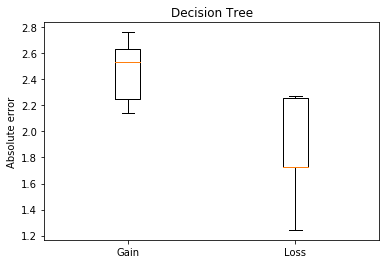

In [20]:
regressionTree = DecisionTreeRegressor(max_depth = 8)
trainModel(regressionTree)